In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Raw_Data = pd.read_csv('healthcare-dataset-stroke-data.csv')
Raw_Data = Raw_Data.drop(['id'], axis=1)
Raw_Data = Raw_Data[Raw_Data['gender'] != 'Other']
Raw_Data.reset_index(drop=True)
Raw_Data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Check Data

In [3]:
Raw_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


**Check Target**

In [4]:
Raw_Data['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

In [5]:
Raw_Data['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [6]:
Raw_Data['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [7]:
Raw_Data['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [8]:
Raw_Data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [9]:
Raw_Data['smoking_status'].value_counts() 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [10]:
Raw_Data['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

In [11]:
Raw_Data['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

In [12]:
Raw_Data['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [13]:
Raw_Data['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [14]:
Raw_Data['bmi'].describe()


count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [15]:
Raw_Data.isnull().sum()
Raw_Data = Raw_Data.dropna()

In [16]:
Raw_Data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
Raw_Data.reset_index(drop=True)
Raw_Data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Prepair Feature

In [18]:
X1 = Raw_Data[['age']]
X2 = Raw_Data[['bmi']]
X3 = Raw_Data[['avg_glucose_level']]

X8 = Raw_Data[['hypertension']]
X9 = Raw_Data[['heart_disease']]

X4 = Raw_Data[['gender']]
X5 = Raw_Data[['ever_married']]
X6 = Raw_Data[['work_type']]
X7 = Raw_Data[['smoking_status']]
X10 = Raw_Data[['Residence_type']]

y = Raw_Data['stroke']

In [19]:
X4_dummy = pd.get_dummies(X4)
X5_dummy = pd.get_dummies(X5)
X6_dummy = pd.get_dummies(X6)
X7_dummy = pd.get_dummies(X7)
X10_dummy = pd.get_dummies(X10)

In [20]:
Prepro_Data = pd.concat([X1, X2, X3, X8, X9, X4, X5, X6, X7, X10], axis=1)

Test_Data = pd.concat([X1, X2, X3, X8, X9, X4, X5, X6, X7, X10], axis=1)

Test_Data_dummy = pd.concat([X1, X2, X3, X8, X9, X4_dummy, X5_dummy, X6_dummy, X7_dummy, X10_dummy], axis=1)

In [21]:
Prepro_Data

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender,ever_married,work_type,smoking_status,Residence_type
0,67.0,36.6,228.69,0,1,Male,Yes,Private,formerly smoked,Urban
2,80.0,32.5,105.92,0,1,Male,Yes,Private,never smoked,Rural
3,49.0,34.4,171.23,0,0,Female,Yes,Private,smokes,Urban
4,79.0,24.0,174.12,1,0,Female,Yes,Self-employed,never smoked,Rural
5,81.0,29.0,186.21,0,0,Male,Yes,Private,formerly smoked,Urban
...,...,...,...,...,...,...,...,...,...,...
5104,13.0,18.6,103.08,0,0,Female,No,children,Unknown,Rural
5106,81.0,40.0,125.20,0,0,Female,Yes,Self-employed,never smoked,Urban
5107,35.0,30.6,82.99,0,0,Female,Yes,Self-employed,never smoked,Rural
5108,51.0,25.6,166.29,0,0,Male,Yes,Private,formerly smoked,Rural


**feature engineering**

In [22]:
def classify_birth_year_group(age):
  birth_year = 2024 - age
  if birth_year >= 2013:
      return 'Gen_Alpha'
  elif 1995 <= birth_year <= 2012:
      return 'Gen_Z'
  elif 1980 <= birth_year <= 1994:
      return 'Gen_Y'
  elif 1965 <= birth_year <= 1979:
      return 'Gen_X'
  else:
      return 'Baby_Boomer'


Prepro_Data['Generation'] = Prepro_Data['age'].apply(classify_birth_year_group)

X11 = Prepro_Data[['Generation']]

In [23]:
def classify_glucose_level(glucose):
    if glucose < 70:
        return '<70'
    elif 70 <= glucose < 90:
        return '70-90'
    elif 90 <= glucose < 110:
        return '90-110'
    elif 110 <= glucose < 130:
        return '110-130'
    elif 130 <= glucose < 150:
        return '130-150'
    elif 150 <= glucose < 170:
        return '150-170'
    elif 170 <= glucose < 190:
        return '170-190'
    elif 190 <= glucose < 210:
        return '190-210'
    elif 210 <= glucose < 230:
        return '210-230'
    else:
        return '>230'


Prepro_Data['glucose_binned'] = Prepro_Data['avg_glucose_level'].apply(classify_glucose_level)


X12 = Prepro_Data['glucose_binned']

In [24]:
def classify_bmi_group(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:  
        return 'Healthy Weight'
    elif 25.0 <= bmi <= 29.9:  
        return 'Overweight'
    else:
        return 'Obesity'


Prepro_Data['bmi_group'] = Prepro_Data['bmi'].apply(classify_bmi_group)
X13 = Prepro_Data['bmi_group']


# Analyze data

**GENDER STROKE RISK** 

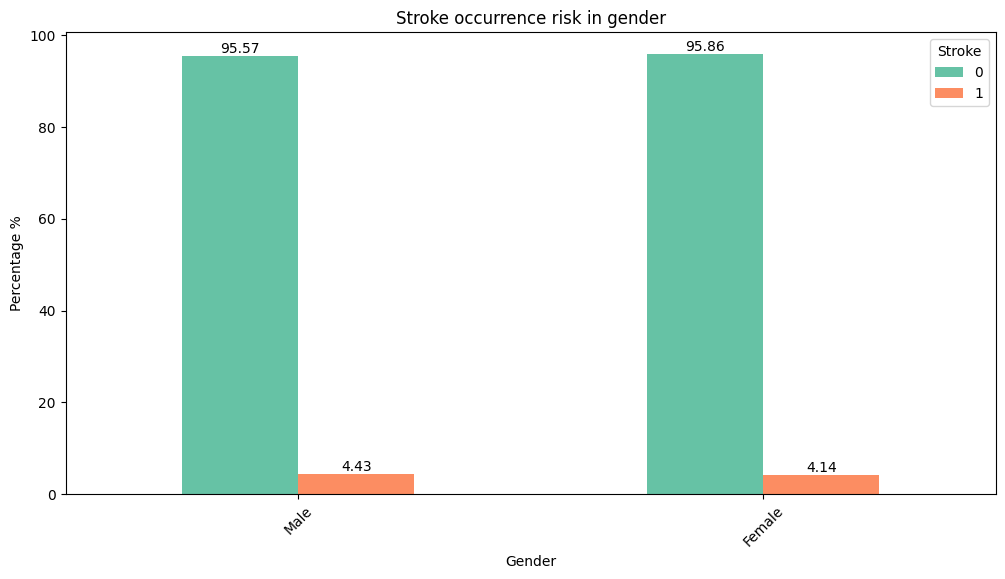

In [25]:
gender_Stroke = pd.concat([X4, y], axis=1)


fig, ax = plt.subplots(figsize=(12, 6))

gender_stroke_counts = gender_Stroke.groupby(['gender', 'stroke']).size().unstack()
gender_Stroke_totals = gender_stroke_counts.sum(axis=1)
gender_stroke_percent = gender_stroke_counts.div(gender_Stroke_totals, axis=0) * 100
ax = round(gender_stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))


for container in ax.containers:
    ax.bar_label(container)


plt.title('Stroke occurrence risk in gender')
plt.xlabel('Gender')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

 2007/ Female 2853

**Stroke Occurrence in Residence Type**

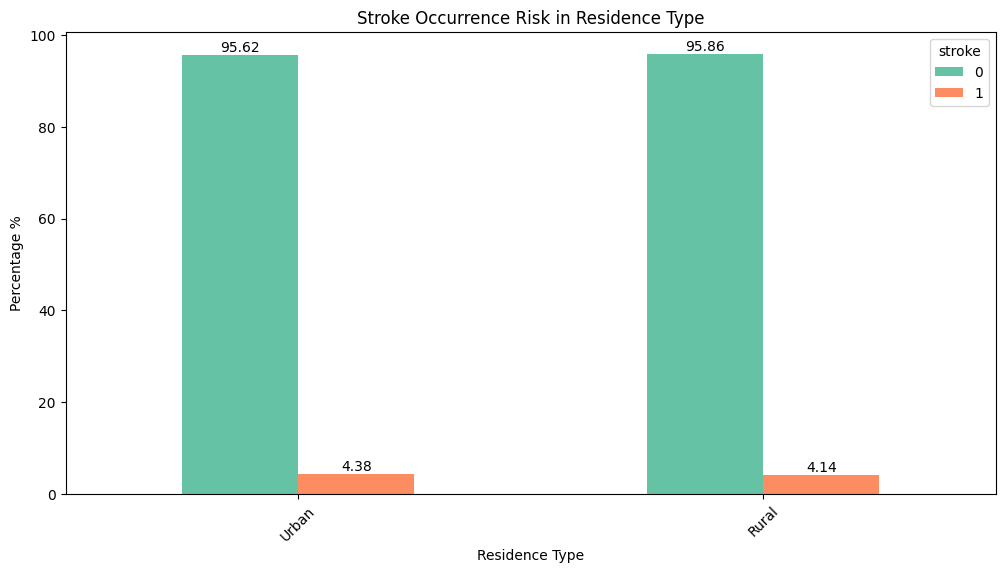

In [26]:
Reside_stroke = pd.concat([X10, y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

Reside_stroke_counts = Reside_stroke.groupby(['Residence_type', 'stroke']).size().unstack()
Reside_stroke_totals = Reside_stroke_counts.sum(axis=1)
Reside_stroke_percent = Reside_stroke_counts.div(Reside_stroke_totals, axis=0) * 100

ax = round(Reside_stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=Reside_stroke, x='Residence_type', hue='stroke', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Stroke Occurrence Risk in Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='stroke')

**WORK TYPE STROKE RISK** 

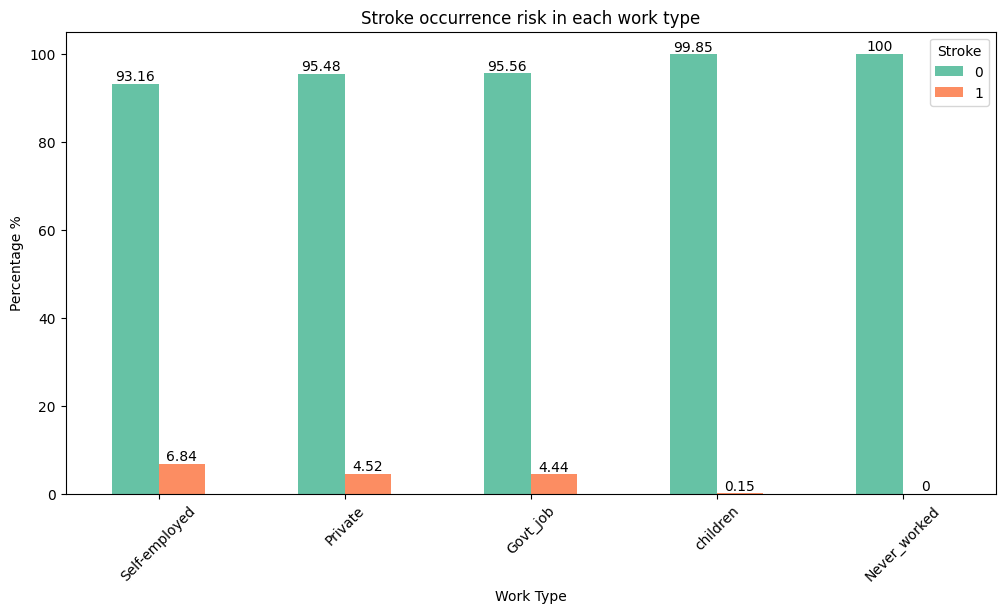

In [27]:
work_type_Stroke = pd.concat([X6, y], axis=1)


fig, ax = plt.subplots(figsize=(12, 6 ))

work_type_Stroke_counts = work_type_Stroke.groupby(['work_type', 'stroke']).size().unstack()
work_type_Stroke_totals = work_type_Stroke_counts.sum(axis=1)
work_type_stroke_percent = work_type_Stroke_counts.div(work_type_Stroke_totals, axis=0) * 100
ax = round(work_type_stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=work_type_Stroke, x='work_type', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Stroke occurrence risk in each work type')
plt.xlabel('Work Type')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()




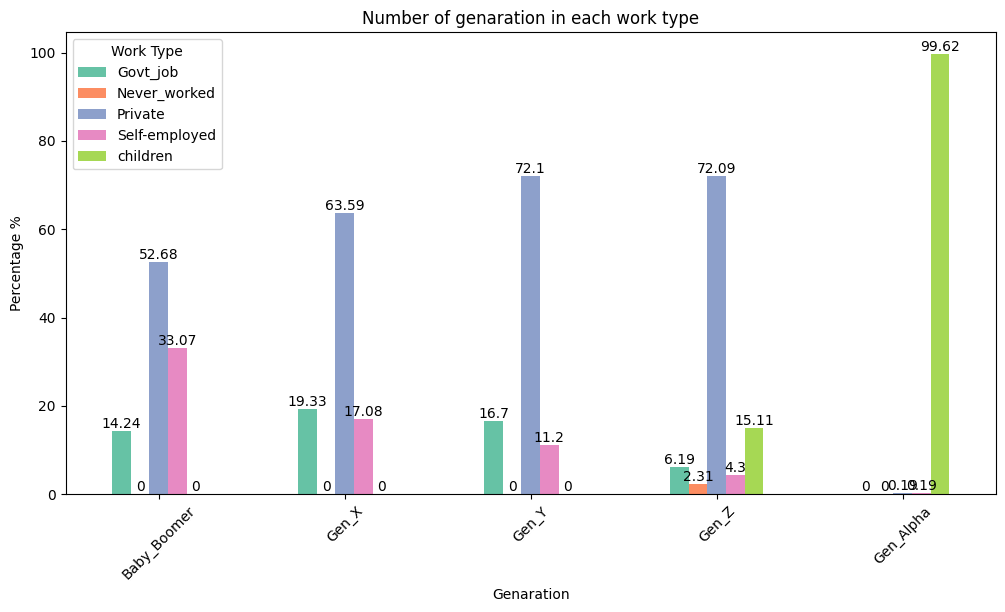

In [28]:
work_type_gen = pd.concat([X11, X6], axis=1)

fig, ax = plt.subplots(figsize=(12, 6 ))

work_type_gen_counts = work_type_gen.groupby(['Generation', 'work_type']).size().unstack()
work_type_gen_totals = work_type_gen_counts.sum(axis=1)
work_type_gen_percent = work_type_gen_counts.div(work_type_gen_totals, axis=0) * 100
ax = round(work_type_gen_percent, 2).sort_values(by='Self-employed', ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=work_type_Stroke, x='work_type', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of genaration in each work type')
plt.xlabel('Genaration')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Work Type')
plt.show()


**SMOKE STATUS STROKE RISK**

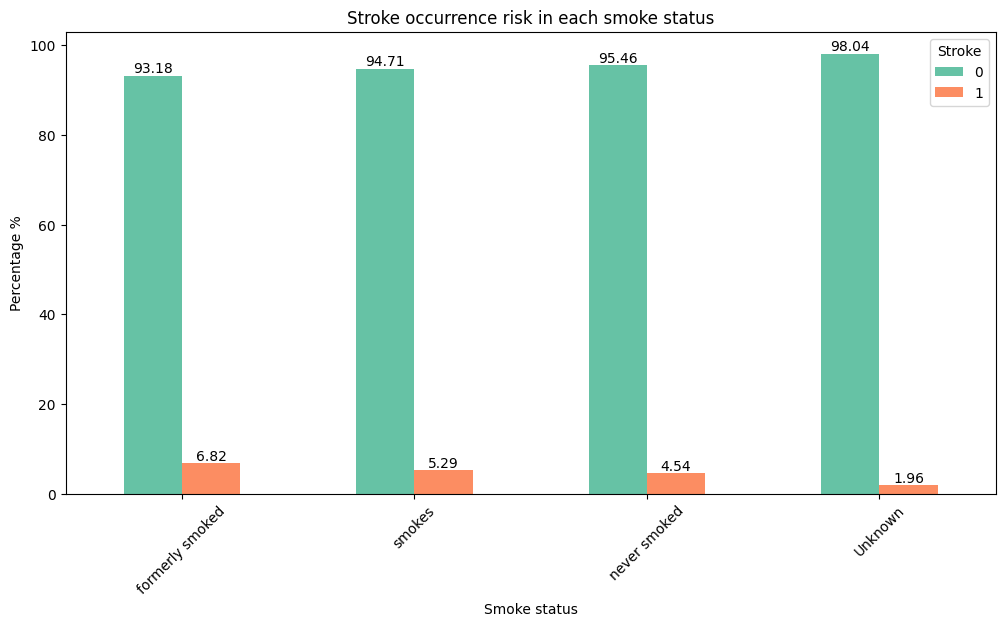

In [29]:
smoke_Stroke = pd.concat([X7, y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

smoke_Stroke_counts = smoke_Stroke.groupby(['smoking_status', 'stroke']).size().unstack()
smoke_Stroke_totals = smoke_Stroke_counts.sum(axis=1)
smoke_Stroke_percent = smoke_Stroke_counts.div(smoke_Stroke_totals, axis=0) * 100
ax = round(smoke_Stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gender_Stroke, x='smoking_status', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Stroke occurrence risk in each smoke status')
plt.xlabel('Smoke status')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

**GENERATION STROKE RISK** 

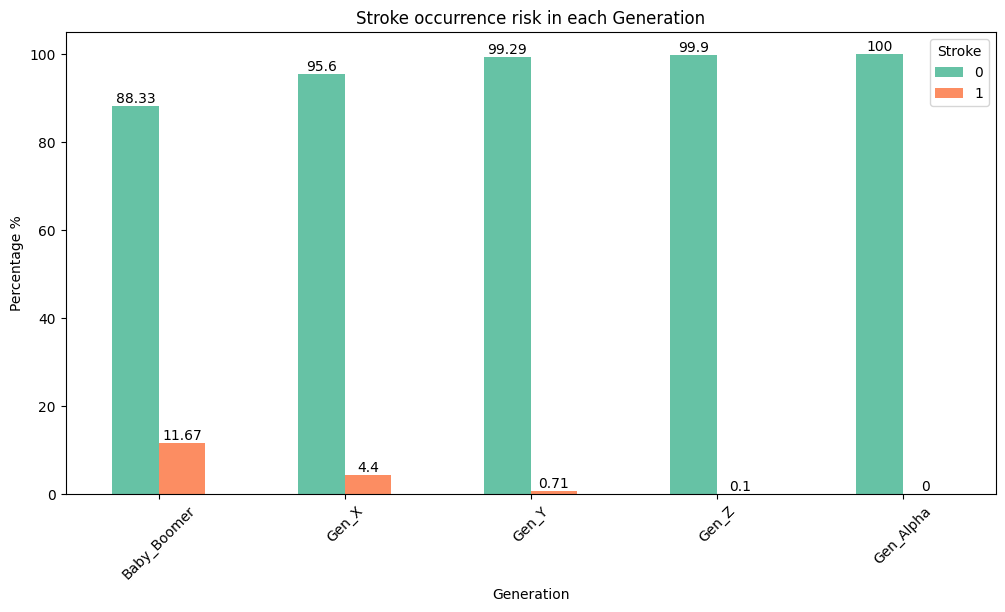

In [30]:
gen_Stroke = pd.concat([X11, y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

gen_Stroke_counts = gen_Stroke.groupby(['Generation', 'stroke']).size().unstack()
gen_Stroke_totals = gen_Stroke_counts.sum(axis=1)
gen_Stroke_percent = gen_Stroke_counts.div(gen_Stroke_totals, axis=0) * 100

ax = round(gen_Stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_Stroke, x='Generation', hue='stroke', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Stroke occurrence risk in each Generation')
plt.xlabel('Generation')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

**AVERAGE GLUCOSE STROKE RISK** 

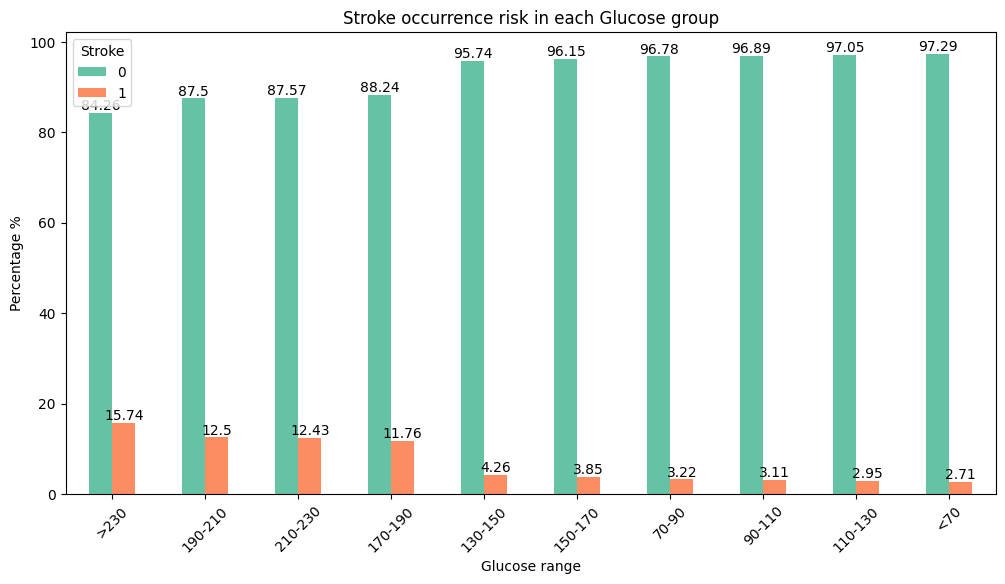

In [31]:
glu_Stroke = pd.concat([X12, y], axis=1)  

fig, ax = plt.subplots(figsize=(12, 6))

glu_Stroke_counts = glu_Stroke.groupby(['glucose_binned', 'stroke']).size().unstack()
glu_Stroke_totals = glu_Stroke_counts.sum(axis=1)
glu_Stroke_percent = glu_Stroke_counts.div(glu_Stroke_totals, axis=0) * 100

ax = round(glu_Stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

for container in ax.containers:
    ax.bar_label(container)

plt.title('Stroke occurrence risk in each Glucose group')
plt.xlabel('Glucose range')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

**AVERAGE GLUCOSE IN GENARATION** 

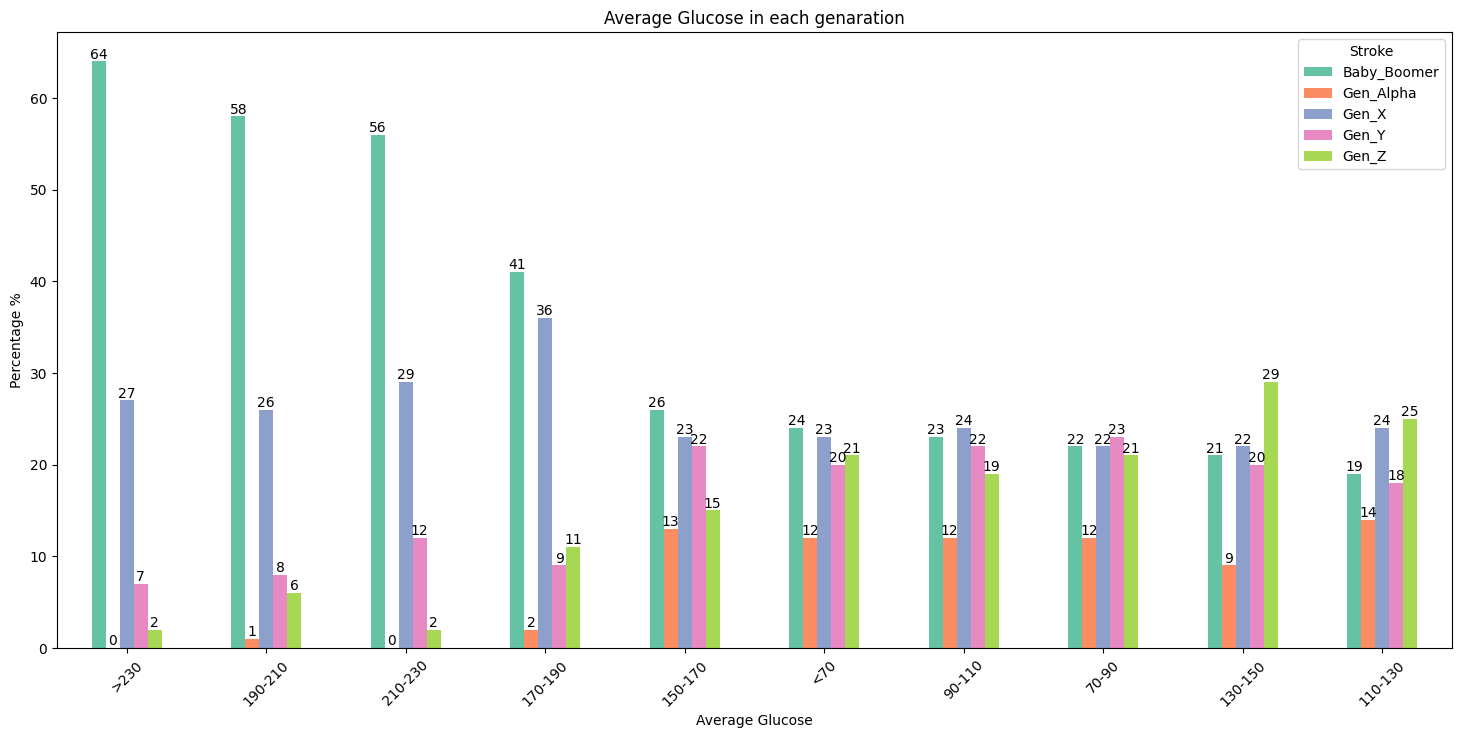

In [32]:
gen_glu = pd.concat([X11, X12], axis=1)  #

fig, ax = plt.subplots(figsize=(18, 8))

gen_glu_counts = gen_glu.groupby(['glucose_binned', 'Generation']).size().unstack()
gen_glu_totals = gen_glu_counts.sum(axis=1)
gen_glu_percent = gen_glu_counts.div(gen_glu_totals, axis=0) * 100

ax = round(gen_glu_percent, 0).sort_values(by='Baby_Boomer', ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_glu, x='Generation', hue='glucose_binned', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Glucose in each genaration')
plt.xlabel('Average Glucose')
plt.ylabel('Percentage %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()

**AVERAGE GLUCOSE IN BMI CATAGORY** 

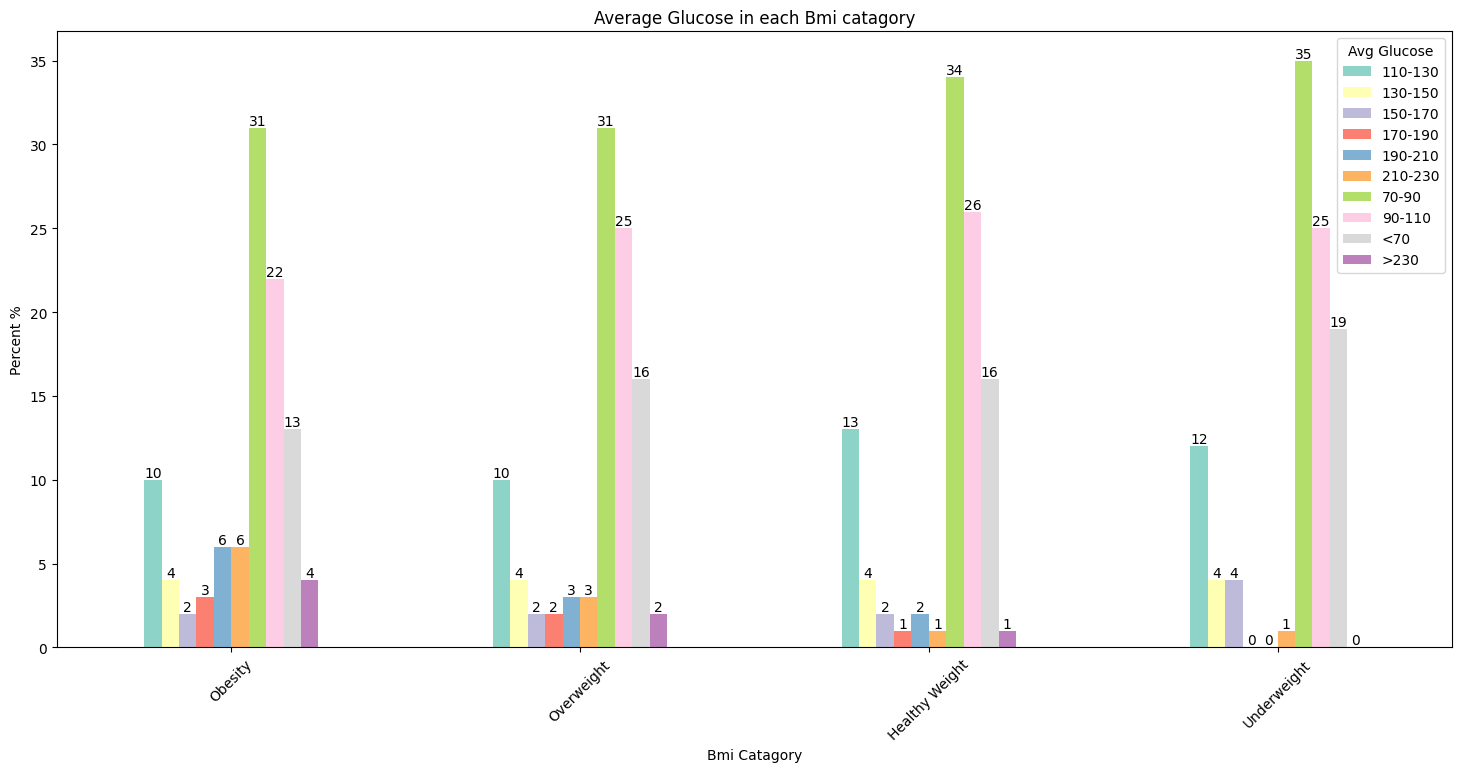

In [33]:
bmi_cat_glu = pd.concat([X12, X13], axis=1)  

fig, ax = plt.subplots(figsize=(18, 8))

bmi_cat_glu_counts = bmi_cat_glu.groupby(['bmi_group', 'glucose_binned']).size().unstack()
bmi_cat_glu_totals = bmi_cat_glu_counts.sum(axis=1)
bmi_cat_glu_percent = bmi_cat_glu_counts.div(bmi_cat_glu_totals, axis=0) * 100

ax = round(bmi_cat_glu_percent, 0).sort_values(by='210-230', ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set3'))

# ax = sns.countplot(data=bmi_cat_glu, x='bmi_group', hue='glucose_binned', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Glucose in each Bmi catagory')
plt.xlabel('Bmi Catagory')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='Avg Glucose')
plt.show()

**SRTOKE RISK IN BMI GROUP**

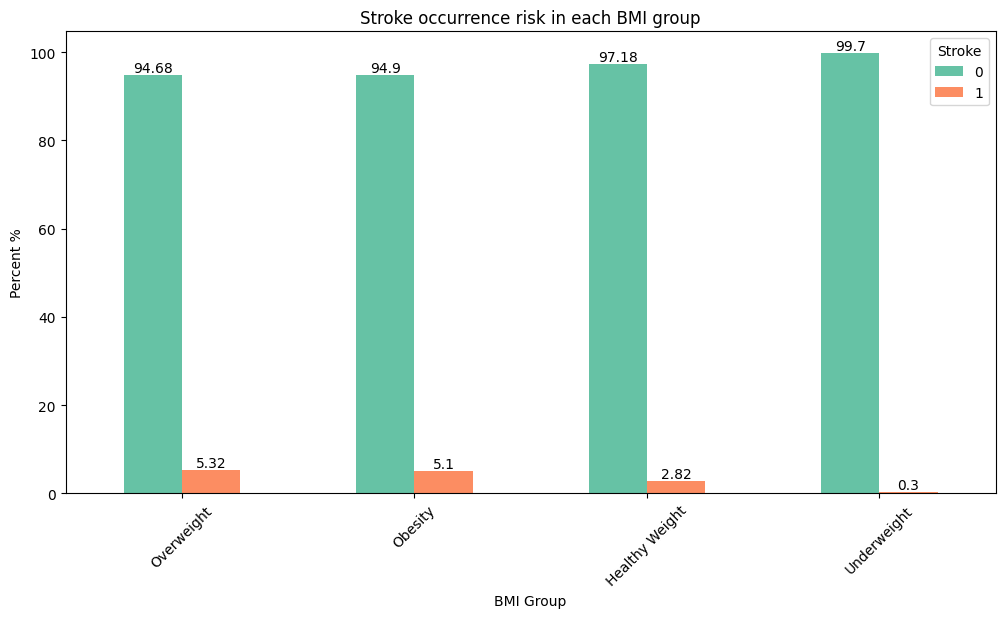

In [34]:
bmi_gr_Stroke = pd.concat([X13, y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

bmi_gr_Stroke_counts = bmi_gr_Stroke.groupby(['bmi_group', 'stroke']).size().unstack()
bmi_gr_Stroke_totals = bmi_gr_Stroke_counts.sum(axis=1)
bmi_gr_Stroke_percent = bmi_gr_Stroke_counts.div(bmi_gr_Stroke_totals, axis=0) * 100

ax = round(bmi_gr_Stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=bmi_gr_Stroke, x='bmi_group', hue='stroke', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('Stroke occurrence risk in each BMI group')
plt.xlabel('BMI Group')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')



In [35]:

# bmi_group_Ob_baby = Prepro_Data[(Prepro_Data['bmi_group'] == 'Obesity') & (Prepro_Data['Generation'] == 'Baby_Boomer') ]
# bmi_group_Ov_baby = Prepro_Data[(Prepro_Data['bmi_group'] == 'Overweight') & (Prepro_Data['Generation'] == 'Baby_Boomer')]


# bmi_group_Ob_Stroke_baby = pd.concat([bmi_group_Ob_baby, y], axis=1)
# bmi_group_Ov_Stroke_baby = pd.concat([bmi_group_Ov_baby, y], axis=1)


# bmi_group_Ob_GenX = Prepro_Data[(Prepro_Data['bmi_group'] == 'Obesity') & (Prepro_Data['Generation'] == 'Gen_X')]
# bmi_group_Ov_GenX = Prepro_Data[(Prepro_Data['bmi_group'] == 'Overweight') & (Prepro_Data['Generation'] == 'Gen_X')]


# bmi_group_Ob_Stroke_GenX = pd.concat([bmi_group_Ob_GenX, y], axis=1)
# bmi_group_Ov_Stroke_GenX = pd.concat([bmi_group_Ov_GenX, y], axis=1)


# fig, ax = plt.subplots(1, 4, figsize=(18, 5))


# bmi_group_Ob_Stroke_baby_counts = bmi_group_Ob_Stroke_baby.groupby(['bmi_group', 'stroke']).size().unstack()
# bmi_group_Ob_Stroke_baby_totals = bmi_group_Ob_Stroke_baby_counts.sum(axis=1)
# bmi_group_Ob_Stroke_baby_percent = bmi_group_Ob_Stroke_baby_counts.div(bmi_group_Ob_Stroke_baby_totals, axis=0) * 100

# round(bmi_group_Ob_Stroke_baby_percent, 2).plot(kind='bar', stacked=False, ax=ax[0], color=sns.color_palette('Set2'))

# for container in ax[0].containers:
#     ax[0].bar_label(container)

# ax[0].set_title('(Baby_Boomer) Stroke Occurrence Risk')
# ax[0].set_xlabel('BMI Group')
# ax[0].set_ylabel('Percentage')
# ax[0].legend(title='Stroke')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# ##

# bmi_group_Ov_Stroke_baby_counts = bmi_group_Ov_Stroke_baby.groupby(['bmi_group', 'stroke']).size().unstack()
# bmi_group_Ov_Stroke_baby_totals = bmi_group_Ov_Stroke_baby_counts.sum(axis=1)
# bmi_group_Ov_Stroke_baby_percent = bmi_group_Ov_Stroke_baby_counts.div(bmi_group_Ov_Stroke_baby_totals, axis=0) * 100

# round(bmi_group_Ov_Stroke_baby_percent, 2).plot(kind='bar', stacked=False, ax=ax[1], color=sns.color_palette('Set2'))

# for container in ax[1].containers:
#     ax[1].bar_label(container)

# ax[1].set_title('(Baby_Boomer) Stroke Occurrence Risk')
# ax[1].set_xlabel('BMI Group')
# ax[1].set_ylabel('Percentage')
# ax[1].legend(title='Stroke')
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

# ##

# bmi_group_Ob_Stroke_GenX_counts = bmi_group_Ob_Stroke_GenX.groupby(['bmi_group', 'stroke']).size().unstack()
# bmi_group_Ob_Stroke_GenX_totals = bmi_group_Ob_Stroke_GenX_counts.sum(axis=1)
# bmi_group_Ob_Stroke_GenX_percent = bmi_group_Ob_Stroke_GenX_counts.div(bmi_group_Ob_Stroke_GenX_totals, axis=0) * 100

# round(bmi_group_Ob_Stroke_GenX_percent, 2).plot(kind='bar', stacked=False, ax=ax[2], color=sns.color_palette('Set2'))

# for container in ax[2].containers:
#     ax[2].bar_label(container)

# ax[2].set_title('(Gen X) Stroke Occurrence Risk')
# ax[2].set_xlabel('BMI Group')
# ax[2].set_ylabel('Percentage')
# ax[2].legend(title='Stroke')
# ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

# ##

# bmi_group_Ov_Stroke_GenX_counts = bmi_group_Ov_Stroke_GenX.groupby(['bmi_group', 'stroke']).size().unstack()
# bmi_group_Ov_Stroke_GenX_totals = bmi_group_Ov_Stroke_GenX_counts.sum(axis=1)
# bmi_group_Ov_Stroke_GenX_percent = bmi_group_Ov_Stroke_GenX_counts.div(bmi_group_Ov_Stroke_GenX_totals, axis=0) * 100

# round(bmi_group_Ov_Stroke_GenX_percent, 2).plot(kind='bar', stacked=False, ax=ax[3], color=sns.color_palette('Set2'))

# for container in ax[3].containers:
#     ax[3].bar_label(container)

# ax[3].set_title('(Gen X) Stroke Occurrence Risk')
# ax[3].set_xlabel('BMI Group')
# ax[3].set_ylabel('Percentage')
# ax[3].legend(title='Stroke')
# ax[3].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


# plt.tight_layout()
# plt.show()



**Marry Stroke Occurrence**

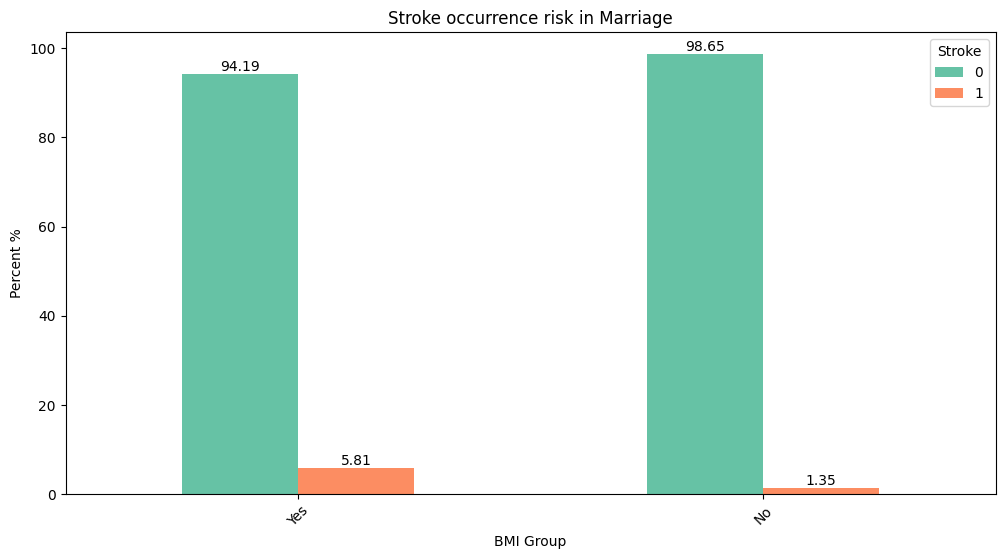

In [36]:
marry_Stroke = pd.concat([X5,y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

marry_Stroke_counts = marry_Stroke.groupby(['ever_married', 'stroke']).size().unstack()
marry_Stroke_totals = marry_Stroke_counts.sum(axis=1)
marry_Stroke_percent = marry_Stroke_counts.div(marry_Stroke_totals, axis=0) * 100

ax = round(marry_Stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=marry_Stroke, x='ever_married', hue='stroke', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('Stroke occurrence risk in Marriage')
plt.xlabel('BMI Group')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')

**Hypertension in Generation**

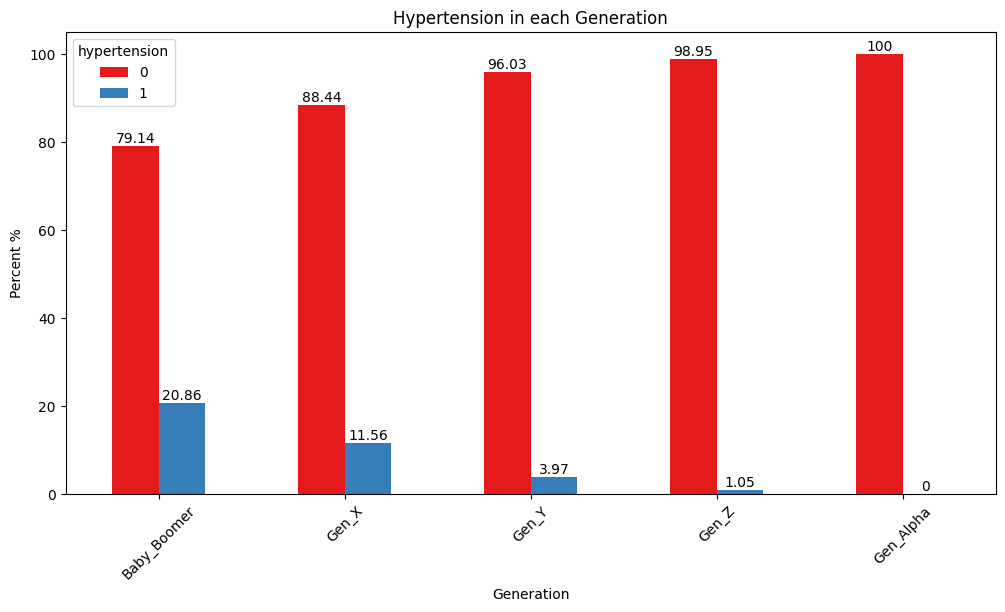

In [37]:
gen_hy = pd.concat([X11, X8], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

gen_hy_counts = gen_hy.groupby(['Generation', 'hypertension']).size().unstack()
gen_hy_totals = gen_hy_counts.sum(axis=1)
gen_hy_percent = gen_hy_counts.div(gen_hy_totals, axis=0) * 100

ax = round(gen_hy_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set1'))

# ax = sns.countplot(data=gen_hy, x='Generation', hue='hypertension', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)


plt.title('Hypertension in each Generation')
plt.xlabel('Generation')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='hypertension')

**Heart Disease in Generation**

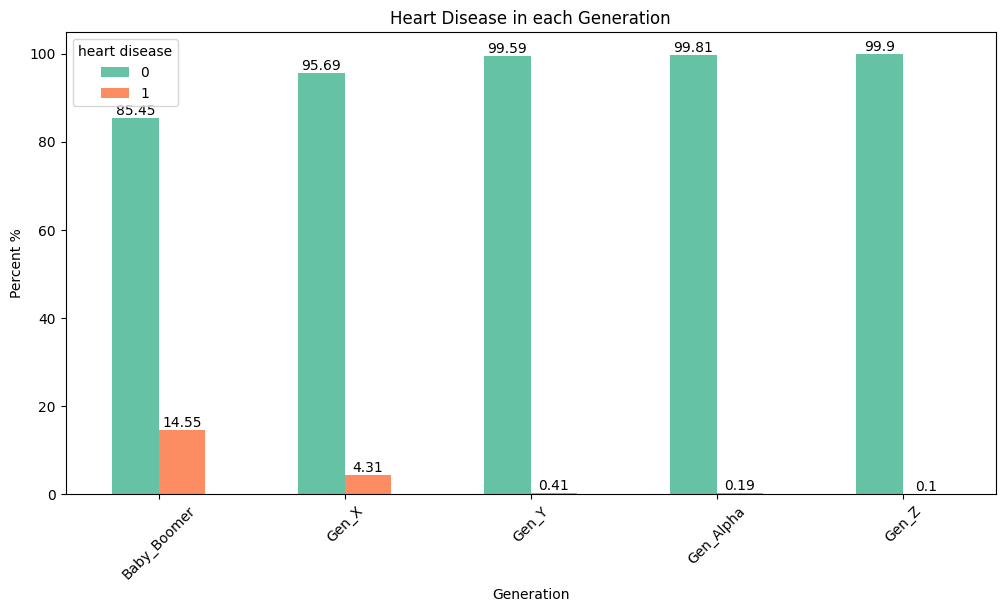

In [38]:
gen_he = pd.concat([X11, X9], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

gen_he_counts = gen_he.groupby(['Generation', 'heart_disease']).size().unstack()
gen_he_totals = gen_he_counts.sum(axis=1)
gen_he_percent = gen_he_counts.div(gen_he_totals, axis=0) * 100

ax = round(gen_he_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_he, x='Generation', hue='heart_disease', palette='Set1')


for container in ax.containers:
    ax.bar_label(container)


plt.title('Heart Disease in each Generation')
plt.xlabel('Generation')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='heart disease')

**Stroke in Baby Boomer hypertension and heart disease**

[Text(0, 0, 'Baby_Boomer')]

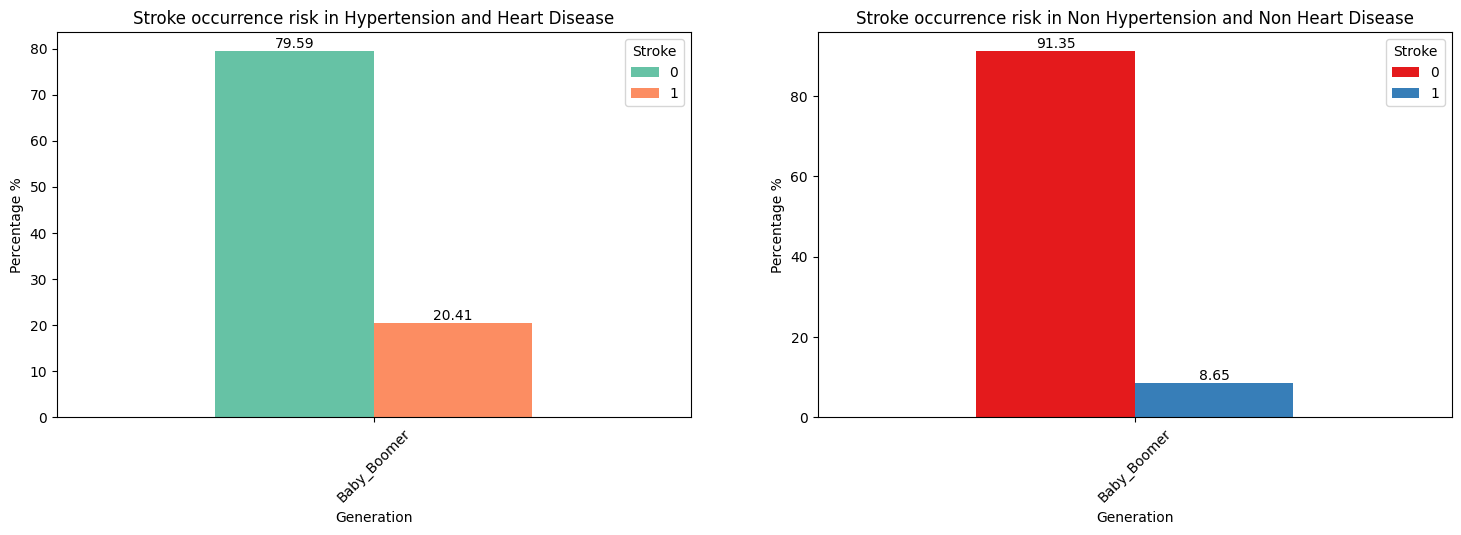

In [39]:
baby_b_hyper_hd_1 = Prepro_Data[(Prepro_Data['hypertension'] == 1) & (Prepro_Data['heart_disease'] == 1) & (Prepro_Data['Generation'] == 'Baby_Boomer')]
baby_b_hyper_hd_0 = Prepro_Data[(Prepro_Data['hypertension'] == 0) & (Prepro_Data['heart_disease'] == 0) & (Prepro_Data['Generation'] == 'Baby_Boomer')]

baby_target_1 = pd.concat([baby_b_hyper_hd_1, y], axis=1)
baby_target_0 = pd.concat([baby_b_hyper_hd_0, y], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(18, 5))

baby_target_1_counts = baby_target_1.groupby(['Generation', 'stroke']).size().unstack()
baby_target_1_totals = baby_target_1_counts.sum(axis=1)
baby_target_1_percent = baby_target_1_counts.div(baby_target_1_totals, axis=0) * 100

round(baby_target_1_percent, 2).plot(kind='bar', stacked=False, ax=ax[0], color=sns.color_palette('Set2'))

for container in ax[0].containers:
    ax[0].bar_label(container)

ax[0].set_title('Stroke occurrence risk in Hypertension and Heart Disease')
ax[0].set_xlabel('Generation')
ax[0].set_ylabel('Percentage %')
ax[0].legend(title='Stroke')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

##

baby_target_0_counts = baby_target_0.groupby(['Generation', 'stroke']).size().unstack()
baby_target_0_totals = baby_target_0_counts.sum(axis=1)
baby_target_0_percent = baby_target_0_counts.div(baby_target_0_totals, axis=0) * 100

round(baby_target_0_percent, 2).plot(kind='bar', stacked=False, ax=ax[1], color=sns.color_palette('Set1'))

for container in ax[1].containers:
    ax[1].bar_label(container)

ax[1].set_title('Stroke occurrence risk in Non Hypertension and Non Heart Disease')
ax[1].set_xlabel('Generation')
ax[1].set_ylabel('Percentage %')
ax[1].legend(title='Stroke')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

**Work Type in Baby Boomer**

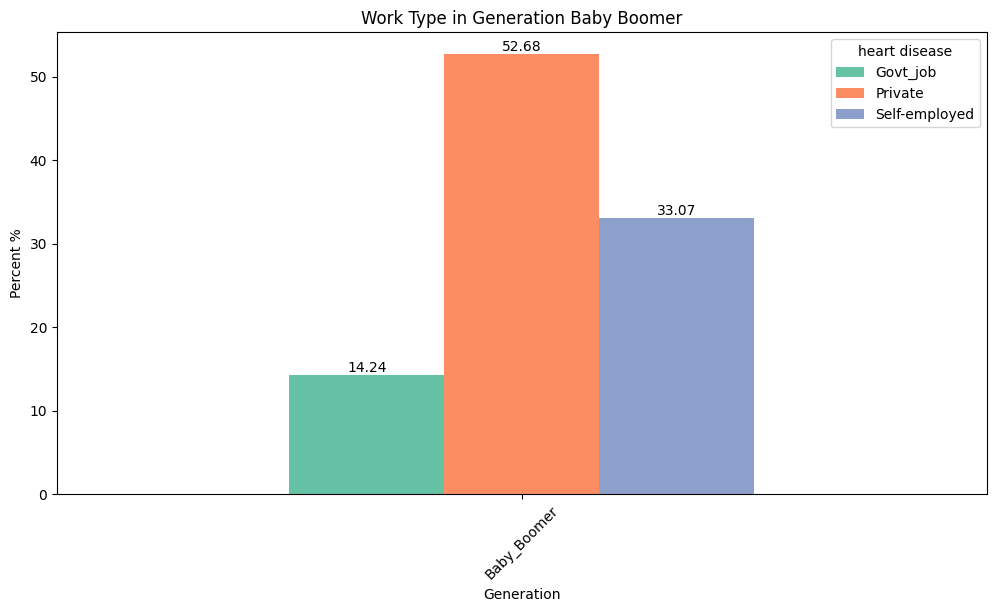

In [40]:
baby_b = X11[X11['Generation'] == 'Baby_Boomer']

baby_work_type = pd.concat([baby_b, X6], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

baby_work_type_counts = baby_work_type.groupby(['Generation', 'work_type']).size().unstack()
baby_work_type_totals = baby_work_type_counts.sum(axis=1)
baby_work_type_percent = baby_work_type_counts.div(baby_work_type_totals, axis=0) * 100

ax = round(baby_work_type_percent, 2).sort_values(by='Private', ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_he, x='Generation', hue='heart_disease', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)


plt.title('Work Type in Generation Baby Boomer')
plt.xlabel('Generation')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='heart disease')


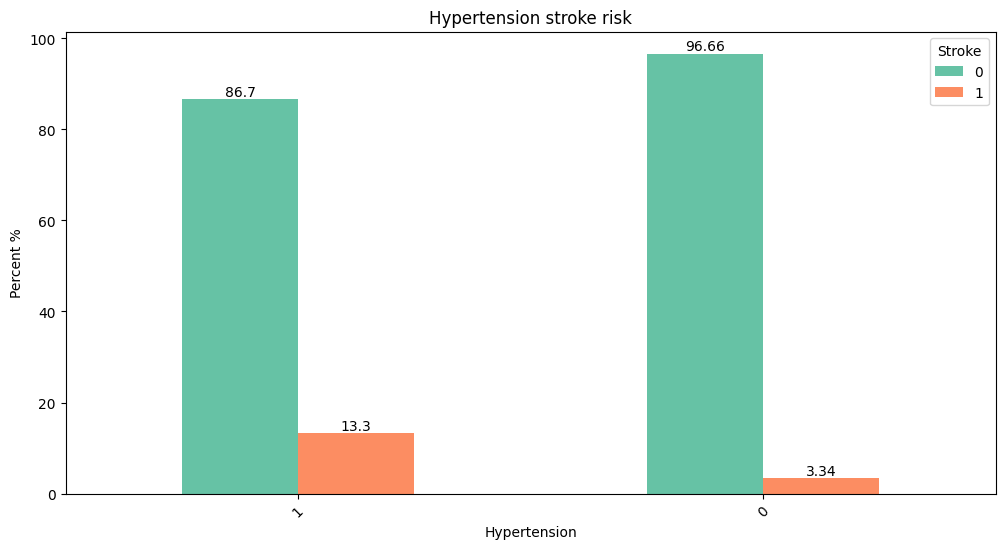

In [41]:
hy_stroke = pd.concat([X8, y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

hy_stroke_counts = hy_stroke.groupby(['hypertension', 'stroke']).size().unstack()
hy_stroke_totals = hy_stroke_counts.sum(axis=1)
hy_stroke_percent = hy_stroke_counts.div(hy_stroke_totals, axis=0) * 100

ax = round(hy_stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_he, x='Generation', hue='heart_disease', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)


plt.title('Hypertension stroke risk')
plt.xlabel('Hypertension')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')

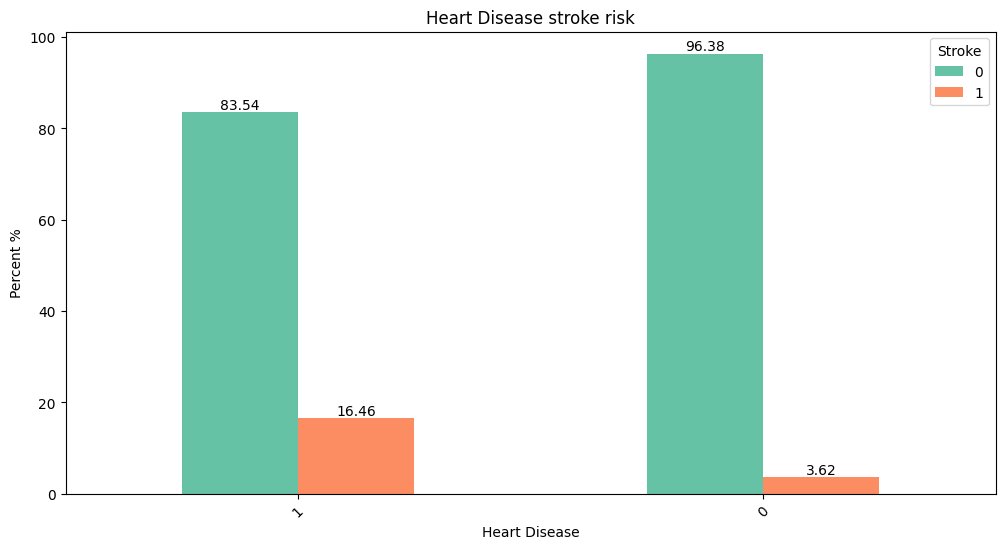

In [42]:
hy_stroke = pd.concat([X9, y], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

hy_stroke_counts = hy_stroke.groupby(['heart_disease', 'stroke']).size().unstack()
hy_stroke_totals = hy_stroke_counts.sum(axis=1)
hy_stroke_percent = hy_stroke_counts.div(hy_stroke_totals, axis=0) * 100

ax = round(hy_stroke_percent, 2).sort_values(by=1, ascending=False).plot(kind='bar', stacked=False, ax=ax, color=sns.color_palette('Set2'))

# ax = sns.countplot(data=gen_he, x='Generation', hue='heart_disease', palette='Set1')

for container in ax.containers:
    ax.bar_label(container)


plt.title('Heart Disease stroke risk')
plt.xlabel('Heart Disease')
plt.ylabel('Percent %')
plt.xticks(rotation=45)
plt.legend(title='Stroke')

In [43]:
X11_dummy = pd.get_dummies(X11)
X12_dummy = pd.get_dummies(X12)
X13_dummy = pd.get_dummies(X13)

In [44]:
Test_Data_y = pd.concat([Test_Data, X11, X12, X13, y], axis=1)

Test_Data_Dummy_all_y = pd.concat([Test_Data_dummy, X11_dummy, X12_dummy, X13_dummy], axis=1) 
Test_Data_Dummy_y = pd.concat([Test_Data_dummy, y], axis=1)

# Postpro_Data_Dummy_all = pd.concat([Test_Data_dummy, X11_dummy, X12_dummy, X13_dummy], axis=1) 
# Postpro_Data_Dummy = Test_Data_dummy

In [45]:
Data_of_Heatmap1 = Test_Data_Dummy_y.astype(float)

# Postpro_Data_Dummy_all = Postpro_Data_Dummy_all.astype(float)
# Postpro_Data_Dummy = Postpro_Data_Dummy.astype(float)

<Axes: >

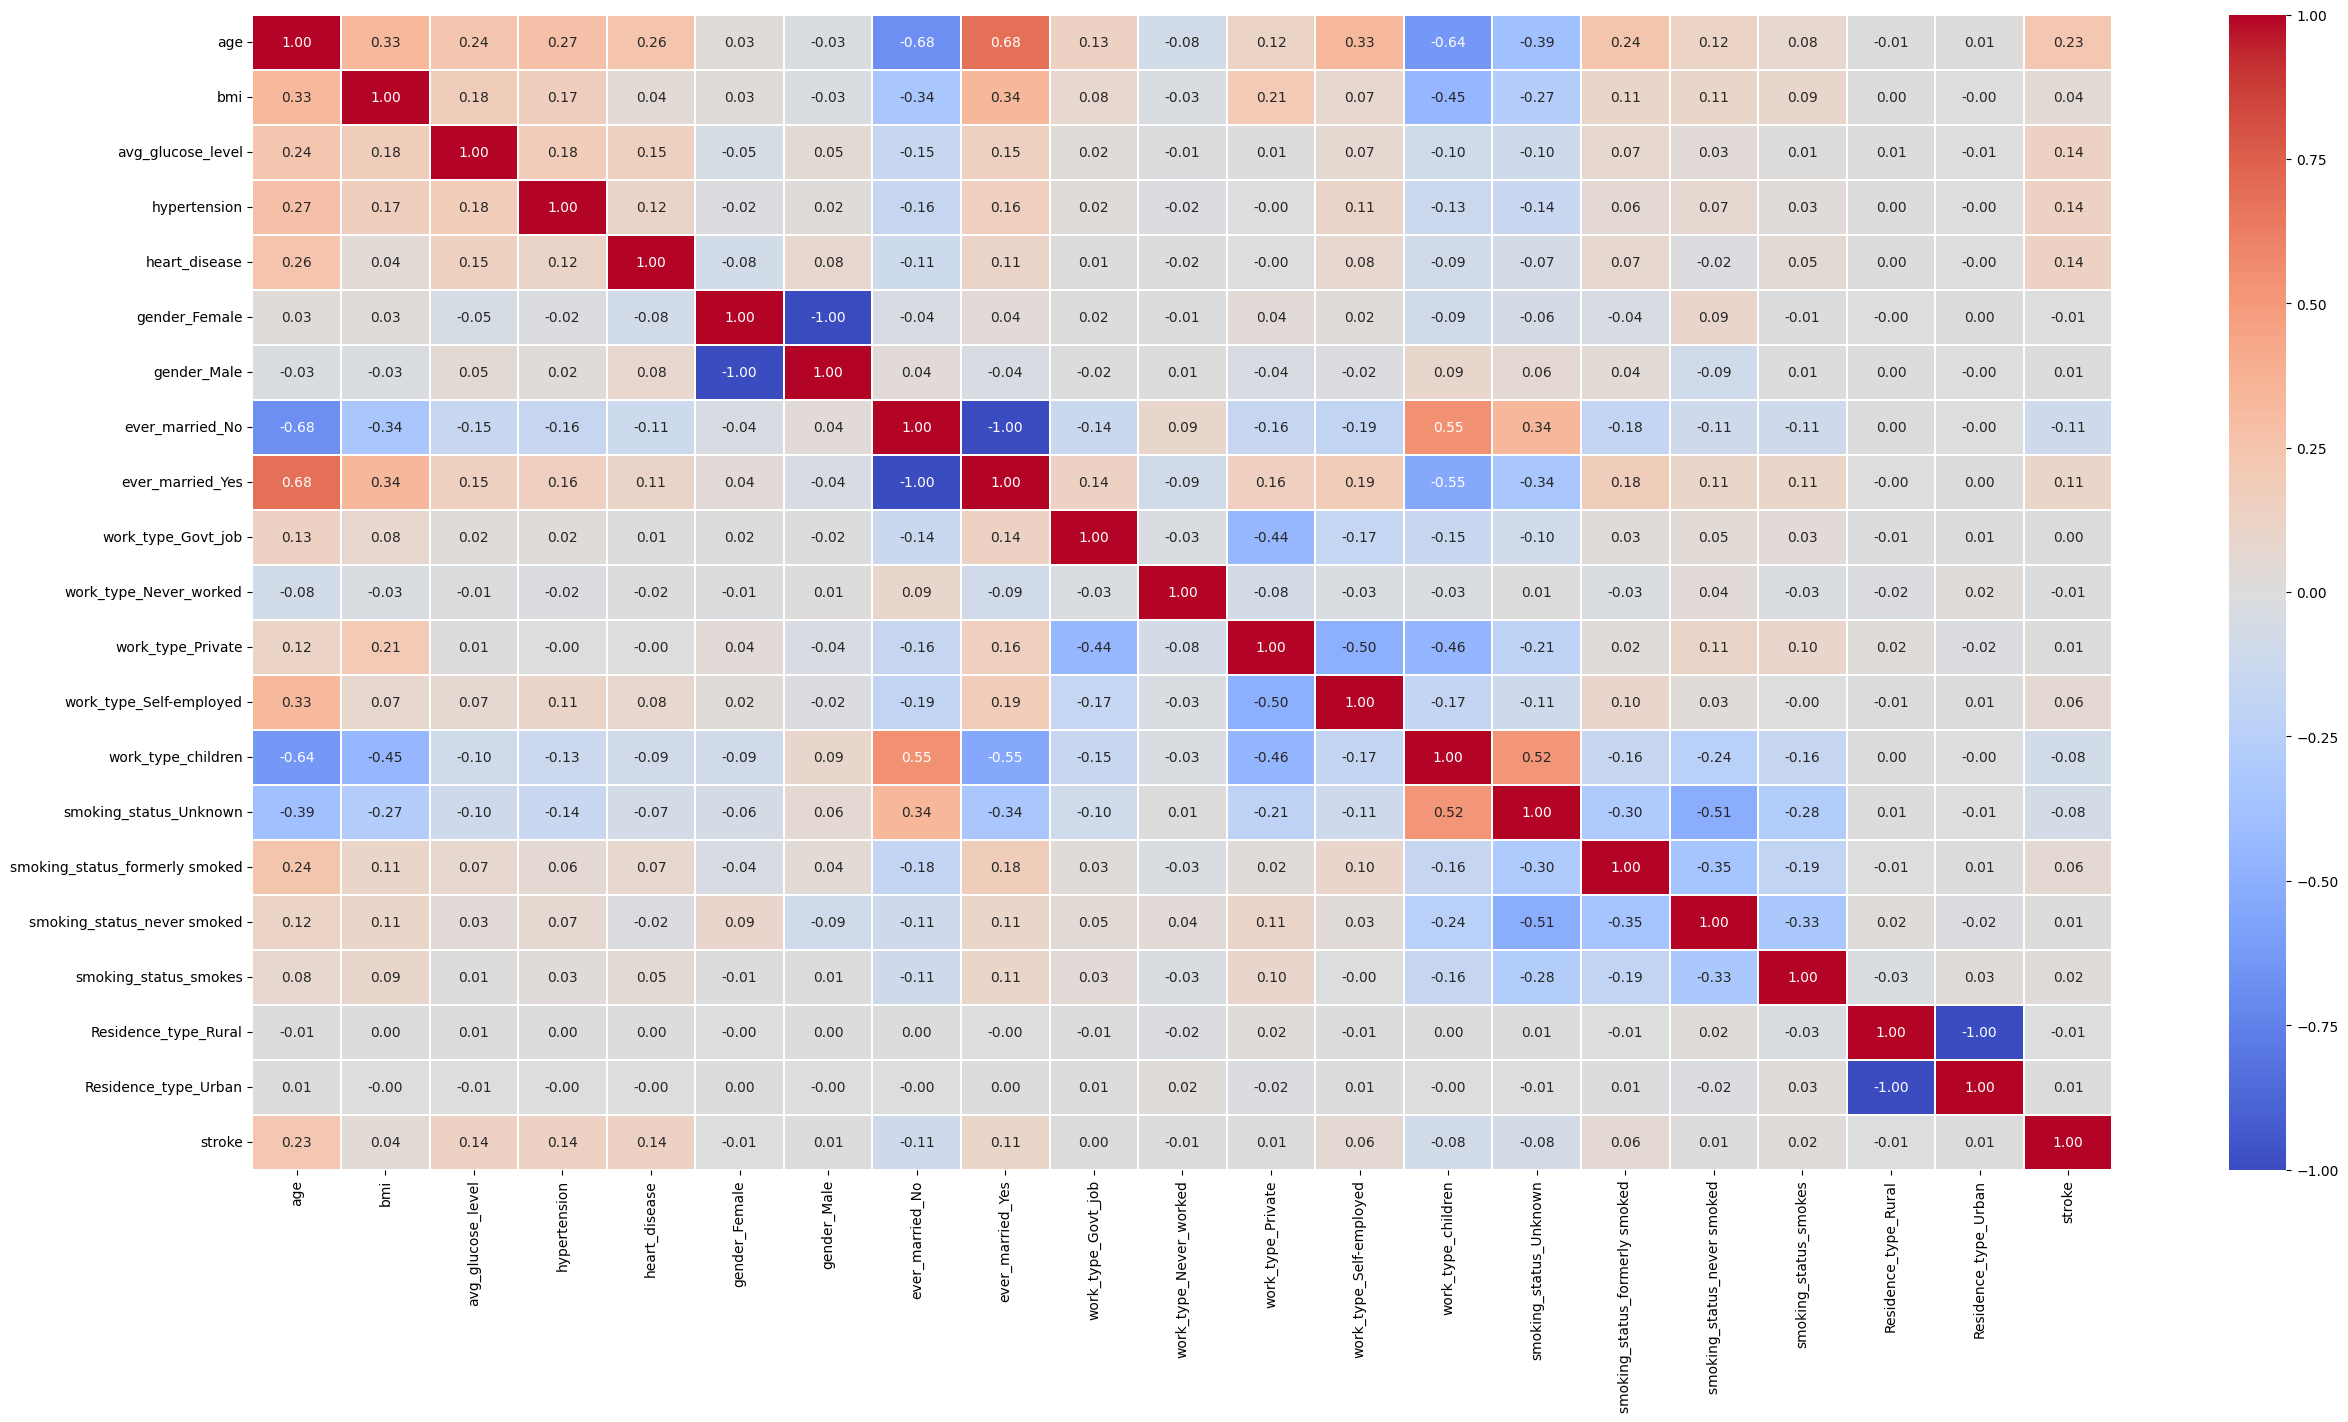

In [46]:
correlation_matrix2 = Test_Data_Dummy_y.corr()

plt.figure(figsize=(30, 15)) 


sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=0.25, fmt='.2f')

<Axes: >

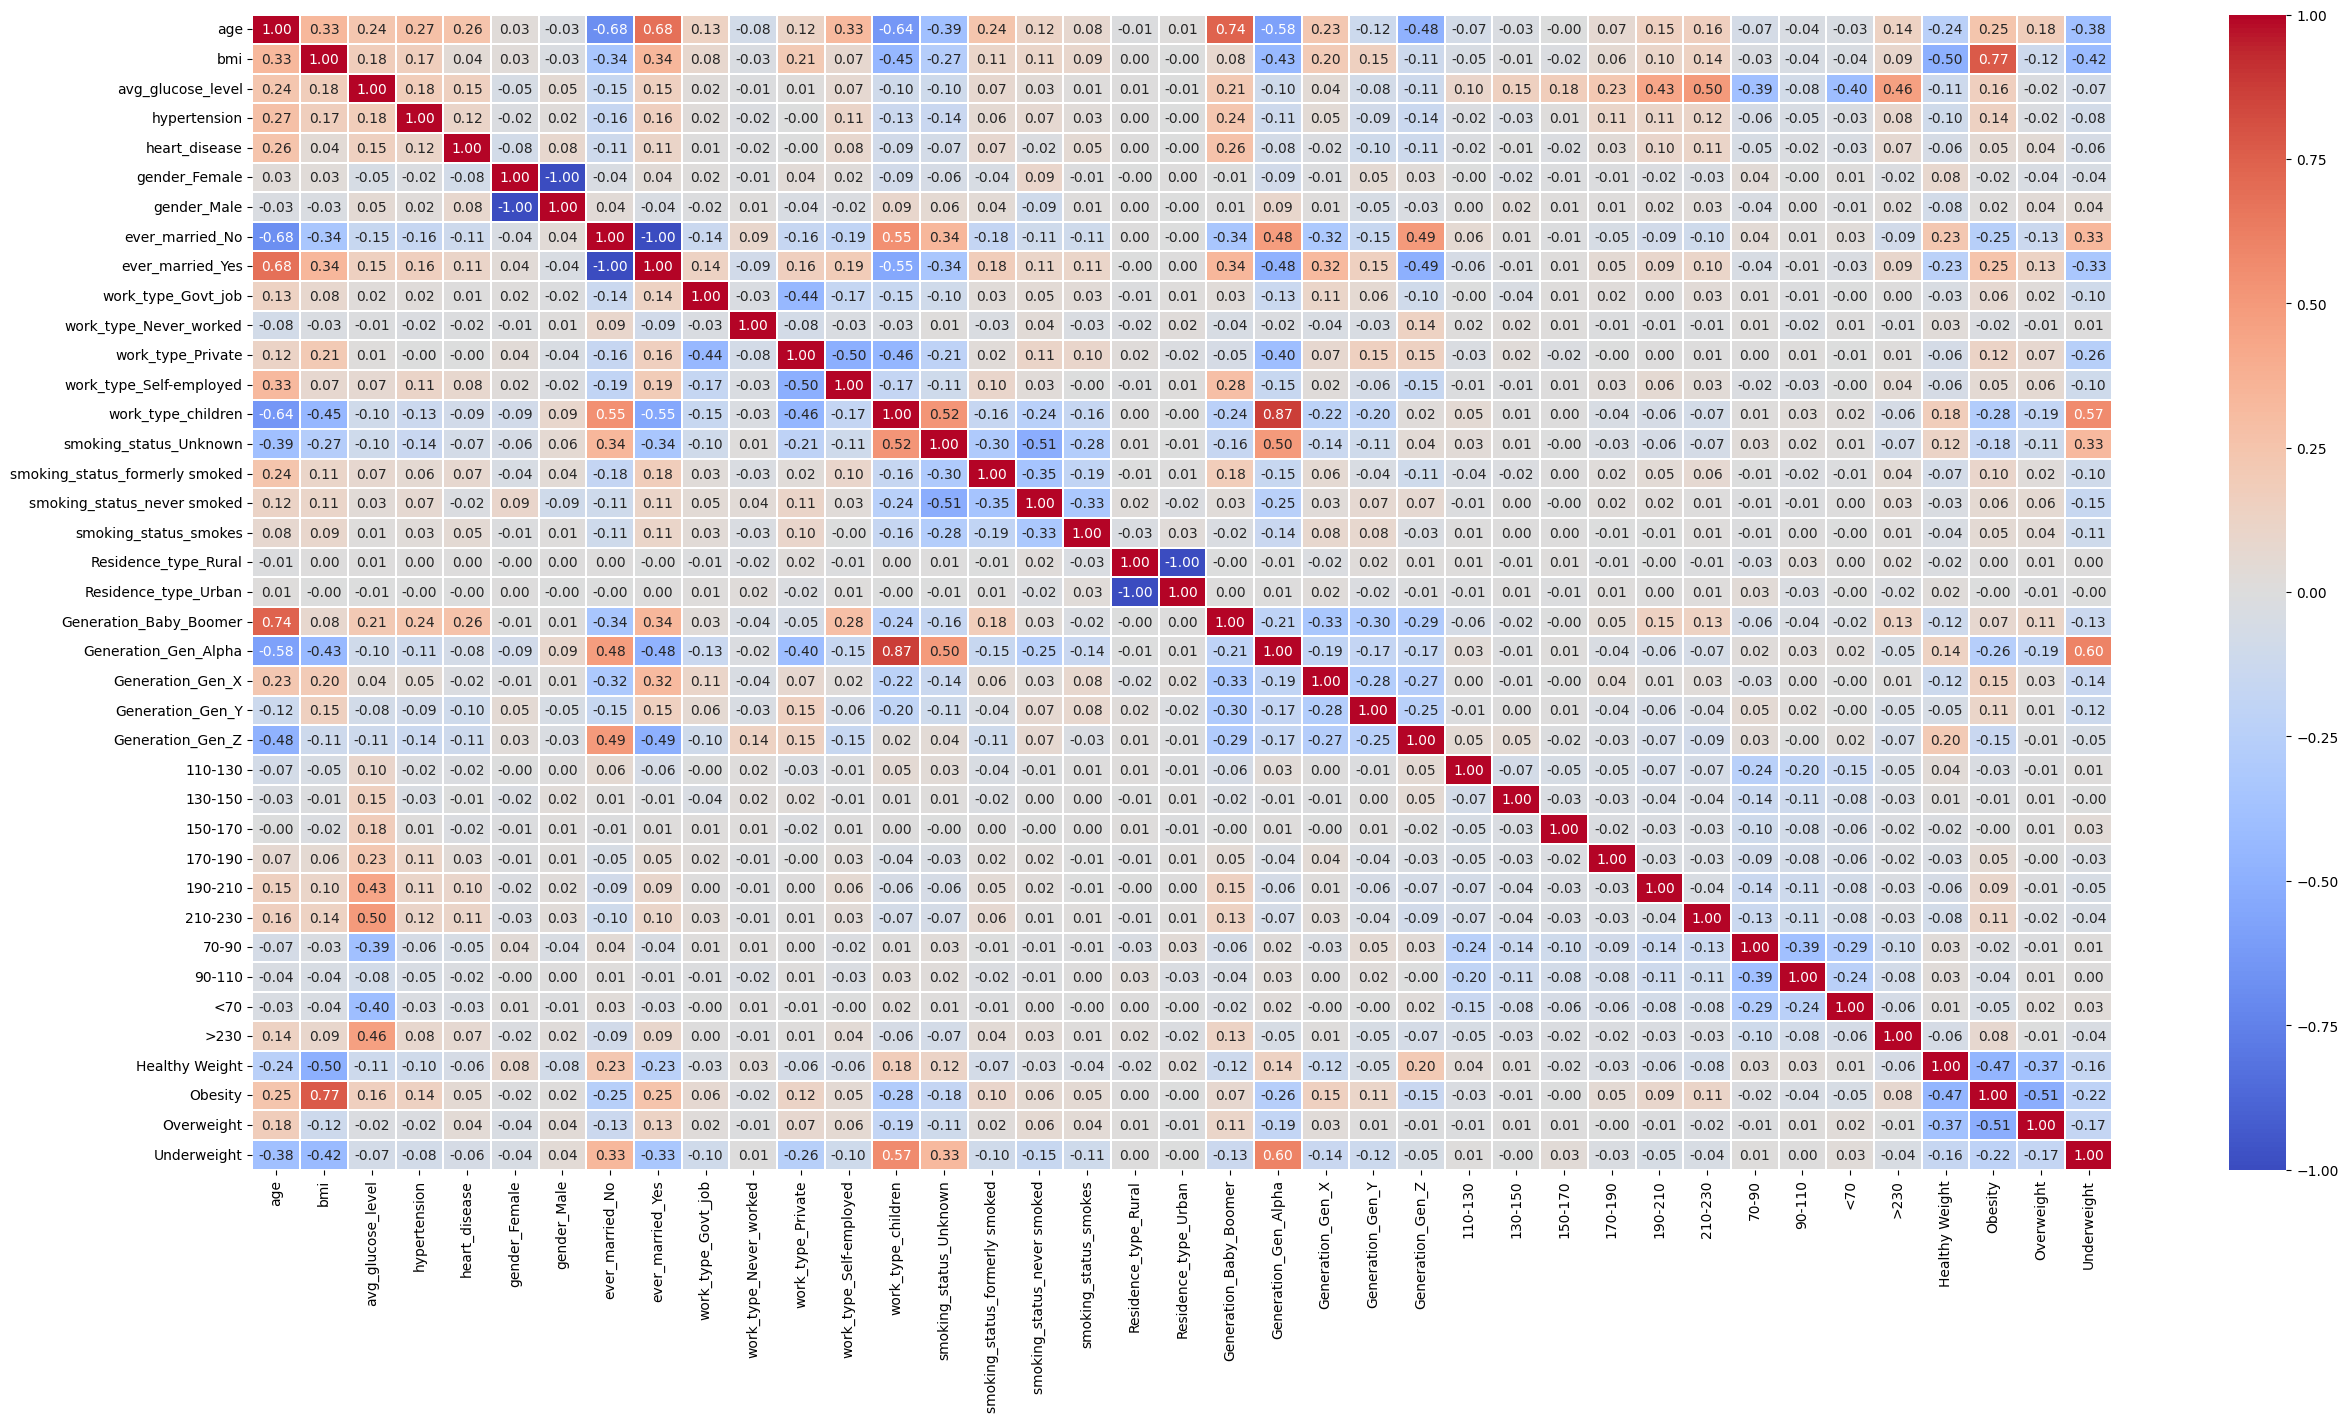

In [47]:
correlation_matrix1 = Test_Data_Dummy_all_y.corr()

plt.figure(figsize=(30, 15)) 


sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.25, fmt='.2f')

**Pre Train data**

In [48]:
Test_Data_y

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender,ever_married,work_type,smoking_status,Residence_type,Generation,glucose_binned,bmi_group,stroke
0,67.0,36.6,228.69,0,1,Male,Yes,Private,formerly smoked,Urban,Baby_Boomer,210-230,Obesity,1
2,80.0,32.5,105.92,0,1,Male,Yes,Private,never smoked,Rural,Baby_Boomer,90-110,Obesity,1
3,49.0,34.4,171.23,0,0,Female,Yes,Private,smokes,Urban,Gen_X,170-190,Obesity,1
4,79.0,24.0,174.12,1,0,Female,Yes,Self-employed,never smoked,Rural,Baby_Boomer,170-190,Healthy Weight,1
5,81.0,29.0,186.21,0,0,Male,Yes,Private,formerly smoked,Urban,Baby_Boomer,170-190,Overweight,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,18.6,103.08,0,0,Female,No,children,Unknown,Rural,Gen_Z,90-110,Healthy Weight,0
5106,81.0,40.0,125.20,0,0,Female,Yes,Self-employed,never smoked,Urban,Baby_Boomer,110-130,Obesity,0
5107,35.0,30.6,82.99,0,0,Female,Yes,Self-employed,never smoked,Rural,Gen_Y,70-90,Obesity,0
5108,51.0,25.6,166.29,0,0,Male,Yes,Private,formerly smoked,Rural,Gen_X,150-170,Overweight,0


In [49]:
Test_Data_y.describe()

,age,bmi,avg_glucose_level,hypertension,heart_disease,stroke
count,4908.000000,4908.00000,4908.000000,4908.000000,4908.000000,4908.000000
mean,42.868810,28.89456,105.297402,0.091891,0.049511,0.042584
std,22.556128,7.85432,44.425550,0.288901,0.216954,0.201937
min,0.080000,10.30000,55.120000,0.000000,0.000000,0.000000
25%,25.000000,23.50000,77.067500,0.000000,0.000000,0.000000
50%,44.000000,28.10000,91.680000,0.000000,0.000000,0.000000
75%,60.000000,33.10000,113.495000,0.000000,0.000000,0.000000
max,82.000000,97.60000,271.740000,1.000000,1.000000,1.000000


In [50]:
Data1 = Test_Data_y[Test_Data_y['smoking_status'] != 'Unknown']
Data1 = Data1.reset_index(drop=True)
Data1.describe()

,age,bmi,avg_glucose_level,hypertension,heart_disease,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,48.652555,30.292350,108.311670,0.119124,0.060146,0.052555
std,18.850018,7.295778,47.706754,0.323982,0.237792,0.223175
min,10.000000,11.500000,55.120000,0.000000,0.000000,0.000000
25%,34.000000,25.300000,77.230000,0.000000,0.000000,0.000000
50%,50.000000,29.100000,92.350000,0.000000,0.000000,0.000000
75%,63.000000,34.100000,116.200000,0.000000,0.000000,0.000000
max,82.000000,92.000000,271.740000,1.000000,1.000000,1.000000


In [51]:
Data_Target_y = Data1['stroke']

In [52]:
Data1['smoking_status'].value_counts()

smoking_status
never smoked       1852
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [53]:
Train_Data_First = Data1[['age', 'bmi', 'avg_glucose_level']]
Train_Data_Secound = Data1[['hypertension', 'heart_disease']]

In [54]:
Train_Data_Dummy_all_Feature = pd.get_dummies(Data1[['gender', 'ever_married', 'work_type', 'smoking_status',
                                  'Residence_type', 'Generation', 'glucose_binned', 'bmi_group']])

Train_Data_Dummy_all_Feature = Train_Data_Dummy_all_Feature.astype(float)

# Final_Train_Data1 = pd.concat([Train_Data_First, Train_Data_Secound, Train_Data_Dummy_all_Feature], axis=1)

In [55]:
columns_to_add = ['age', 'bmi', 'avg_glucose_level','hypertension', 'heart_disease', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
                  'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly_smoked',
                  'smoking_status_never_smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'Generation_Baby_Boomer', 'Generation_Gen_Alpha',
                  'Generation_Gen_X', 'Generation_Gen_Y', 'Generation_Gen_Z', 'glucose_binned_110-130', 'glucose_binned_130-150', 'glucose_binned_150-170', 'glucose_binned_170-190',
                  'glucose_binned_190-210', 'glucose_binned_210-230', 'glucose_binned_70-90', 'glucose_binned_90-110', 'glucose_binned_<70' , 'glucose_binned_>230', 'bmi_group_Healthy_Weight',
                  'bmi_group_Obesity', 'bmi_group_Overweight', 'bmi_group_Underweight']

In [56]:
columns = ['age', 'bmi', 'avg_glucose_level']
                  

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

Train_Data_First1 = scaler.fit_transform(Train_Data_First)

Train_Data_First_DataFrame = pd.DataFrame(Train_Data_First1, columns=columns)

Final_Train_Data1 = pd.concat([Train_Data_First_DataFrame, Train_Data_Secound, Train_Data_Dummy_all_Feature], axis=1)

Final_Train_Data2 = Final_Train_Data1.drop(['Generation_Baby_Boomer', 'Generation_Gen_Alpha',
                    'Generation_Gen_X', 'Generation_Gen_Y', 'Generation_Gen_Z', 'glucose_binned_110-130', 
                    'glucose_binned_130-150', 'glucose_binned_150-170', 'glucose_binned_170-190',
                    'glucose_binned_190-210', 'glucose_binned_210-230', 'glucose_binned_70-90', 
                    'glucose_binned_90-110', 'glucose_binned_<70' , 'glucose_binned_>230', 
                    'bmi_group_Healthy Weight','bmi_group_Obesity', 'bmi_group_Overweight', 
                    'bmi_group_Underweight'], axis=1)



Final_Train_Data1


,age,bmi,avg_glucose_level,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,glucose_binned_190-210,glucose_binned_210-230,glucose_binned_70-90,glucose_binned_90-110,glucose_binned_<70,glucose_binned_>230,bmi_group_Healthy Weight,bmi_group_Obesity,bmi_group_Overweight,bmi_group_Underweight
0,0.973480,0.864688,2.523666,0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.663236,0.302637,-0.050140,0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.018435,0.563100,1.319048,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.610178,-0.862591,1.379636,1,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.716294,-0.177163,1.633096,0,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,1.769352,-0.273123,-0.761883,1,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3421,0.442900,-1.177887,-0.636935,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3422,1.716294,1.330779,0.354055,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3423,-0.724379,0.042174,-0.530855,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
Final_Train_Data2

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
0,0.973480,0.864688,2.523666,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.663236,0.302637,-0.050140,0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.018435,0.563100,1.319048,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.610178,-0.862591,1.379636,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.716294,-0.177163,1.633096,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,1.769352,-0.273123,-0.761883,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3421,0.442900,-1.177887,-0.636935,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3422,1.716294,1.330779,0.354055,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3423,-0.724379,0.042174,-0.530855,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Cross-validation accuracy scores Data1 : [0.94752187 0.94752187 0.94460641 0.94752187 0.94460641 0.94736842
 0.94736842 0.94736842 0.94152047 0.94444444]
Mean cross-validation accuracy score Data1 : 0.9459848601094573
Test set accuracy score Data1 : 0.9406614785992218
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       969
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1028
   macro avg       0.47      0.50      0.48      1028
weighted avg       0.89      0.94      0.91      1028



Cross-validation accuracy scores Data2 : [0.94752187 0.94752187 0.94460641 0.94752187 0.94752187 0.94444444
 0.94736842 0.94736842 0.93859649 0.94444444]
Mean cross-validation accuracy score Data2 : 0.9456916099773244
Test set accuracy score Data2 : 0.9406614785992218
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       969
           1       0.00 

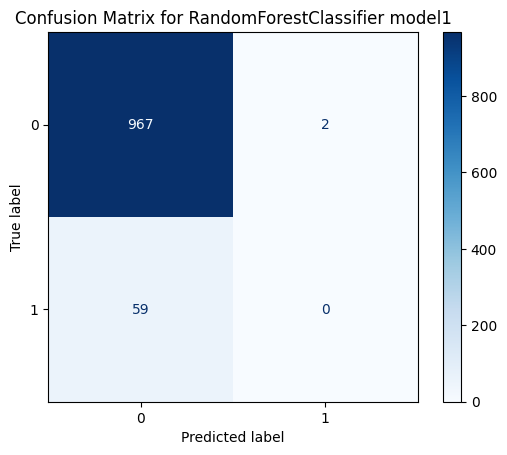

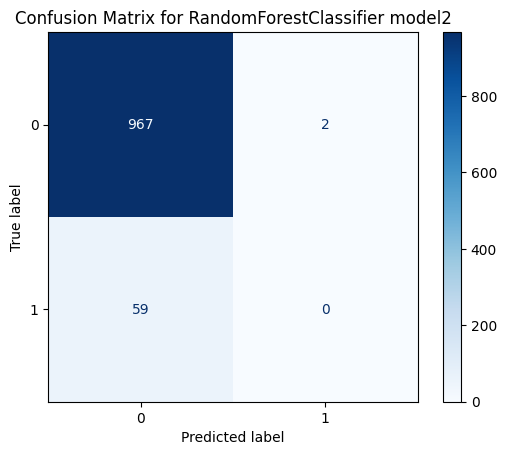

In [60]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(Final_Train_Data1, Data_Target_y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Final_Train_Data2, Data_Target_y, test_size=0.3, random_state=42)

model1 = RandomForestClassifier(class_weight='balanced')
model2 = RandomForestClassifier(class_weight='balanced')

scores1 = cross_val_score(model1, Final_Train_Data1, Data_Target_y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, Final_Train_Data2, Data_Target_y, cv=10, scoring='accuracy')

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)


print("Cross-validation accuracy scores Data1 :", scores1)
print("Mean cross-validation accuracy score Data1 :", scores1.mean())
print("Test set accuracy score Data1 :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

print('\n')

print("Cross-validation accuracy scores Data2 :", scores2)
print("Mean cross-validation accuracy score Data2 :", scores2.mean())
print("Test set accuracy score Data2 :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))


cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier model1')
plt.show()


cm2 = confusion_matrix(y_test2, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier model2')
plt.show()


Cross-validation accuracy scores Data1 : [0.76093294 0.80174927 0.74344023 0.78425656 0.74344023 0.73684211
 0.73976608 0.76900585 0.79532164 0.76023392]
Mean cross-validation accuracy score Data1 : 0.7634988832625782
Test set accuracy score Data1 : 0.7840466926070039
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       969
           1       0.14      0.54      0.22        59

    accuracy                           0.78      1028
   macro avg       0.55      0.67      0.55      1028
weighted avg       0.92      0.78      0.84      1028



Cross-validation accuracy scores Data2 : [0.75218659 0.7755102  0.74635569 0.78134111 0.72303207 0.76900585
 0.75438596 0.78947368 0.78654971 0.74853801]
Mean cross-validation accuracy score Data2 : 0.7626378872350945
Test set accuracy score Data2 : 0.7655642023346303
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       969
           1       0.15 

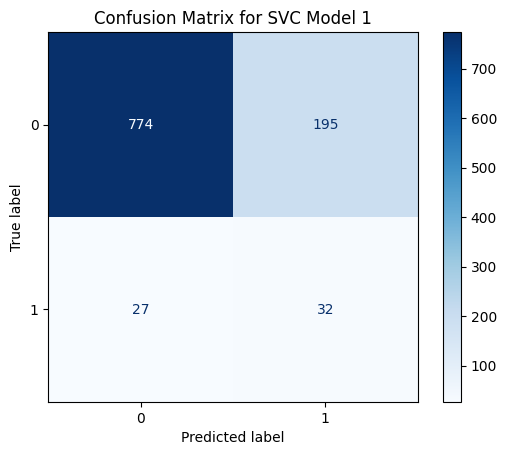

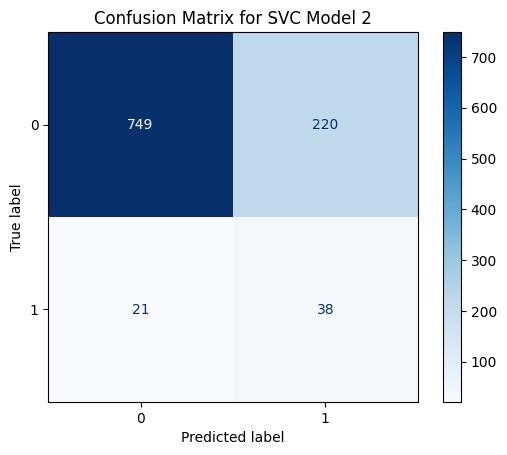

In [69]:
from sklearn.svm import SVC

X_train1, X_test1, y_train1, y_test1 = train_test_split(Final_Train_Data1, Data_Target_y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Final_Train_Data2, Data_Target_y, test_size=0.3, random_state=42)

model1 = SVC(class_weight='balanced')
model2 = SVC(class_weight='balanced')

scores1 = cross_val_score(model1, Final_Train_Data1, Data_Target_y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, Final_Train_Data2, Data_Target_y, cv=10, scoring='accuracy')

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)


print("Cross-validation accuracy scores Data1 :", scores1)
print("Mean cross-validation accuracy score Data1 :", scores1.mean())
print("Test set accuracy score Data1 :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

print('\n')

print("Cross-validation accuracy scores Data2 :", scores2)
print("Mean cross-validation accuracy score Data2 :", scores2.mean())
print("Test set accuracy score Data2 :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))


cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.title('Confusion Matrix for SVC Model 1')
plt.show()


cm2 = confusion_matrix(y_test2, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap='Blues')
plt.title('Confusion Matrix for SVC Model 2')
plt.show()


Cross-validation accuracy scores Data1 : [0.68221574 0.72303207 0.696793   0.72303207 0.66472303 0.70760234
 0.69883041 0.71929825 0.73976608 0.71345029]
Mean cross-validation accuracy score Data1 : 0.7068743286788399
Test set accuracy score Data1 : 0.7042801556420234
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       969
           1       0.14      0.80      0.24        59

    accuracy                           0.70      1028
   macro avg       0.56      0.75      0.53      1028
weighted avg       0.93      0.70      0.78      1028



Cross-validation accuracy scores Data2 : [0.71720117 0.74052478 0.71137026 0.75801749 0.66472303 0.73976608
 0.71345029 0.72807018 0.77777778 0.72807018]
Mean cross-validation accuracy score Data2 : 0.7278971237617855
Test set accuracy score Data2 : 0.7159533073929961
              precision    recall  f1-score   support

           0       0.98      0.71      0.83       969
           1       0.14 

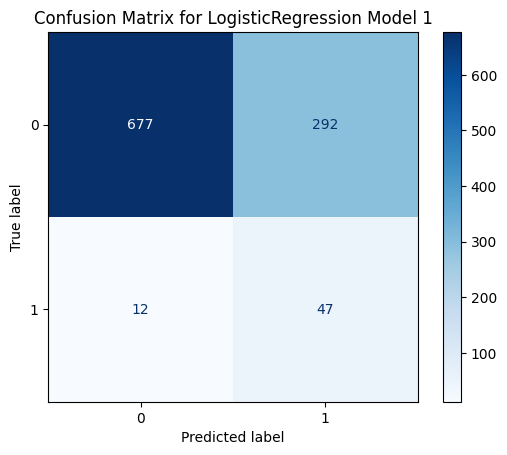

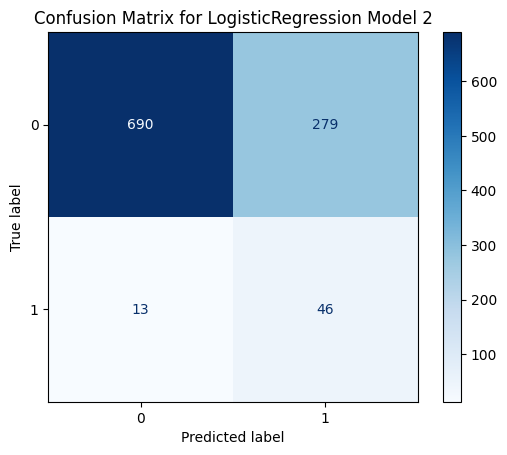

In [68]:
# Your existing code
X_train1, X_test1, y_train1, y_test1 = train_test_split(Final_Train_Data1, Data_Target_y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Final_Train_Data2, Data_Target_y, test_size=0.3, random_state=42)

model1 = LogisticRegression(class_weight='balanced')
model2 = LogisticRegression(class_weight='balanced')

# model1 = LogisticRegression()
# model2 = LogisticRegression()

scores1 = cross_val_score(model1, Final_Train_Data1, Data_Target_y, cv=10, scoring='accuracy')
scores2 = cross_val_score(model2, Final_Train_Data2, Data_Target_y, cv=10, scoring='accuracy')

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)


print("Cross-validation accuracy scores Data1 :", scores1)
print("Mean cross-validation accuracy score Data1 :", scores1.mean())
print("Test set accuracy score Data1 :", accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

print('\n')

print("Cross-validation accuracy scores Data2 :", scores2)
print("Mean cross-validation accuracy score Data2 :", scores2.mean())
print("Test set accuracy score Data2 :", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

# Confusion matrix for model1
cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap='Blues')
plt.title('Confusion Matrix for LogisticRegression Model 1')
plt.show()

# Confusion matrix for model2
cm2 = confusion_matrix(y_test2, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap='Blues')
plt.title('Confusion Matrix for LogisticRegression Model 2')
plt.show()

In [63]:
import pickle

# Open a file in write-binary mode
with open('Final_Model.pkl', 'wb') as f:
    # Use pickle to dump the model1
    pickle.dump(model1, f)

In [64]:
Test_Model = pd.concat([Final_Train_Data1, Data_Target_y], axis=1)

Test_Model.to_csv('Test_Model_Output.csv', index=False)

In [70]:
Test_Model

,age,bmi,avg_glucose_level,hypertension,heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,glucose_binned_210-230,glucose_binned_70-90,glucose_binned_90-110,glucose_binned_<70,glucose_binned_>230,bmi_group_Healthy Weight,bmi_group_Obesity,bmi_group_Overweight,bmi_group_Underweight,stroke
0,0.973480,0.864688,2.523666,0,1,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1.663236,0.302637,-0.050140,0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.018435,0.563100,1.319048,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,1.610178,-0.862591,1.379636,1,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1.716294,-0.177163,1.633096,0,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,1.769352,-0.273123,-0.761883,1,0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3421,0.442900,-1.177887,-0.636935,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3422,1.716294,1.330779,0.354055,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3423,-0.724379,0.042174,-0.530855,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
